In [1]:
print('設定Google網路硬碟，本地端不用這幾行語法')
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

設定Google網路硬碟，本地端不用這幾行語法
Mounted at /content/drive


In [2]:
!pip install yfinance ta

In [3]:
import yfinance as yr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta

ticker = '2330.TW'
df = yr.download(ticker, start='2021-01-01', end='2025-01-01')
print(df.head())
print(df.shape)
print('查看是否有遺失值')
print(df.isnull().sum())
print('查看資料型態')
print(df.dtypes)

/tmp/ipython-input-3-2674451084.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yr.download(ticker, start='2021-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker         2330.TW     2330.TW     2330.TW     2330.TW   2330.TW
Date                                                                
2021-01-04  494.255859  497.944336  486.878906  488.723145  38770328
2021-01-05  499.788391  499.788391  493.333559  494.255678  34411866
2021-01-06  506.243286  511.776000  498.866335  511.776000  53030554
2021-01-07  520.997253  525.607849  509.931825  510.853944  51166782
2021-01-08  534.829102  534.829102  526.530029  534.829102  59563555
(970, 5)
查看是否有遺失值
Price   Ticker 
Close   2330.TW    0
High    2330.TW    0
Low     2330.TW    0
Open    2330.TW    0
Volume  2330.TW    0
dtype: int64
查看資料型態
Price   Ticker 
Close   2330.TW    float64
High    2330.TW    float64
Low     2330.TW    float64
Open    2330.TW    float64
Volume  2330.TW      int64
dtype: object


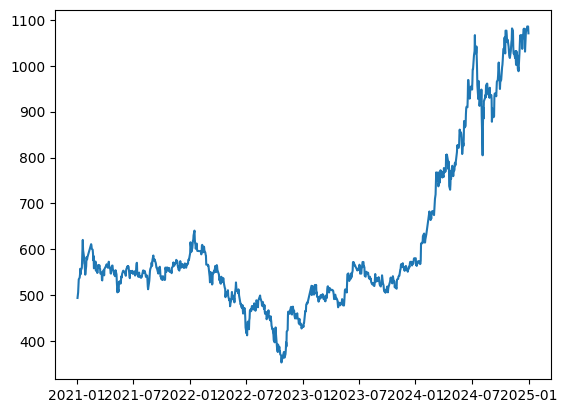

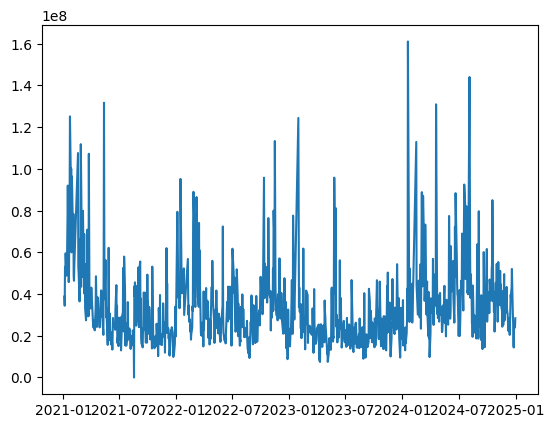

In [4]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.show()
plt.plot(df['Volume'])
plt.show()

擬進行推算，了解資料變化
SMA移動平均
Price            Close        High         Low        Open    Volume
Ticker         2330.TW     2330.TW     2330.TW     2330.TW   2330.TW
Date                                                                
2021-01-04  494.255859  497.944336  486.878906  488.723145  38770328
2021-01-05  499.788391  499.788391  493.333559  494.255678  34411866
2021-01-06  506.243286  511.776000  498.866335  511.776000  53030554
2021-01-07  520.997253  525.607849  509.931825  510.853944  51166782
2021-01-08  534.829102  534.829102  526.530029  534.829102  59563555
(970, 5)
Price            Close        High         Low        Open    Volume SMA50  \
Ticker         2330.TW     2330.TW     2330.TW     2330.TW   2330.TW         
Date                                                                         
2021-01-04  494.255859  497.944336  486.878906  488.723145  38770328   NaN   
2021-01-05  499.788391  499.788391  493.333559  494.255678  34411866   NaN   
2021-01-06  506.243286  511.

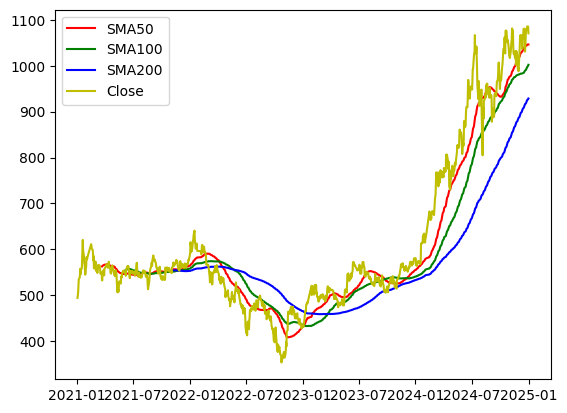

In [5]:
print('擬進行推算，了解資料變化')
print('SMA移動平均')
df1 = df.copy()
print(df1.head())
print(df1.shape)
df1['SMA50'] = ta.trend.sma_indicator(df['Close'].squeeze(), window = 50)
df1['SMA100'] = ta.trend.sma_indicator(df['Close'].squeeze(), window = 100)
df1['SMA200'] = ta.trend.sma_indicator(df['Close'].squeeze(), window = 200)
print(df1.head())
print(df1.shape)

import matplotlib.pyplot as plt
plt.plot(df1['SMA50'], c='r', label='SMA50')
plt.plot(df1['SMA100'], c='g', label='SMA100')
plt.plot(df1['SMA200'], c='b', label='SMA200')
plt.plot(df1['Close'], c='y', label='Close')
plt.legend(loc='best')
plt.show()

擬進行推算，了解資料變化
EMA移動平均
Price            Close        High         Low        Open    Volume SMA50  \
Ticker         2330.TW     2330.TW     2330.TW     2330.TW   2330.TW         
Date                                                                         
2021-01-04  494.255859  497.944336  486.878906  488.723145  38770328   NaN   
2021-01-05  499.788391  499.788391  493.333559  494.255678  34411866   NaN   
2021-01-06  506.243286  511.776000  498.866335  511.776000  53030554   NaN   
2021-01-07  520.997253  525.607849  509.931825  510.853944  51166782   NaN   
2021-01-08  534.829102  534.829102  526.530029  534.829102  59563555   NaN   

Price      SMA100 SMA200  
Ticker                    
Date                      
2021-01-04    NaN    NaN  
2021-01-05    NaN    NaN  
2021-01-06    NaN    NaN  
2021-01-07    NaN    NaN  
2021-01-08    NaN    NaN  
(970, 8)
Price            Close        High         Low        Open    Volume SMA50  \
Ticker         2330.TW     2330.TW     2330.TW     

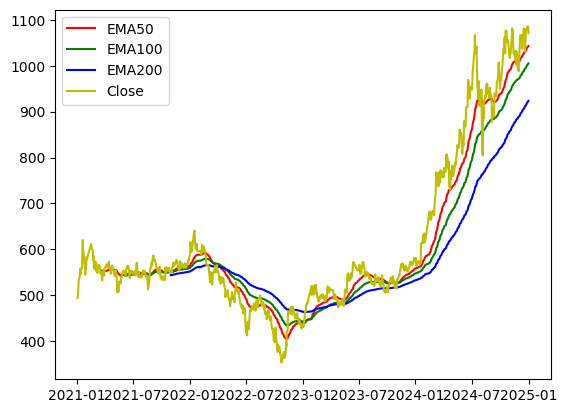

In [6]:
print('擬進行推算，了解資料變化')
print('EMA移動平均')
print(df1.head())
print(df1.shape)
df1['EMA50'] = ta.trend.ema_indicator(df['Close'].squeeze(), window = 50)
df1['EMA100'] = ta.trend.ema_indicator(df['Close'].squeeze(), window = 100)
df1['EMA200'] = ta.trend.ema_indicator(df['Close'].squeeze(), window = 200)
print(df1.head())
print(df1.shape)

import matplotlib.pyplot as plt
plt.plot(df1['EMA50'], c='r', label='EMA50')
plt.plot(df1['EMA100'], c='g', label='EMA100')
plt.plot(df1['EMA200'], c='b', label='EMA200')
plt.plot(df1['Close'], c='y', label='Close')
plt.legend(loc='best')
plt.show()

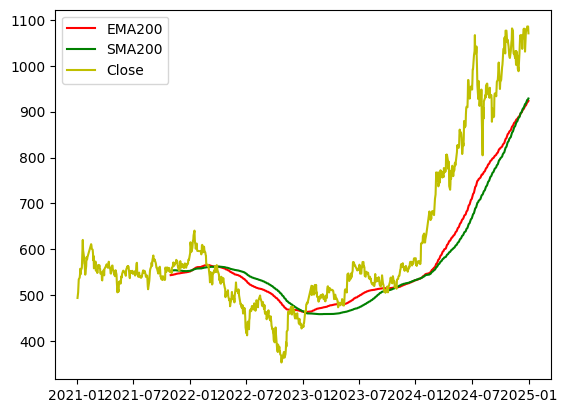

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1['EMA200'], c='r', label='EMA200')
plt.plot(df1['SMA200'], c='g', label='SMA200')
plt.plot(df1['Close'], c='y', label='Close')
plt.legend(loc='best')
plt.show()

擬進行推算，了解資料變化
RSI強弱指標
Price            Close        High         Low        Open    Volume SMA50  \
Ticker         2330.TW     2330.TW     2330.TW     2330.TW   2330.TW         
Date                                                                         
2021-01-04  494.255859  497.944336  486.878906  488.723145  38770328   NaN   
2021-01-05  499.788391  499.788391  493.333559  494.255678  34411866   NaN   
2021-01-06  506.243286  511.776000  498.866335  511.776000  53030554   NaN   
2021-01-07  520.997253  525.607849  509.931825  510.853944  51166782   NaN   
2021-01-08  534.829102  534.829102  526.530029  534.829102  59563555   NaN   

Price      SMA100 SMA200 EMA50 EMA100 EMA200  
Ticker                                        
Date                                          
2021-01-04    NaN    NaN   NaN    NaN    NaN  
2021-01-05    NaN    NaN   NaN    NaN    NaN  
2021-01-06    NaN    NaN   NaN    NaN    NaN  
2021-01-07    NaN    NaN   NaN    NaN    NaN  
2021-01-08    NaN    NaN 

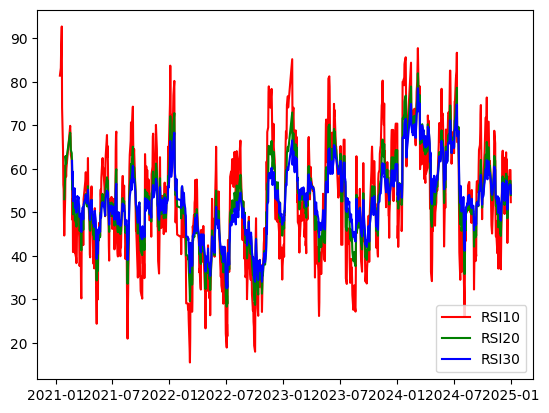

In [8]:
print('擬進行推算，了解資料變化')
print('RSI強弱指標')
print(df1.head())
print(df1.shape)
df1['RSI10'] = ta.momentum.RSIIndicator(df['Close'].squeeze(), window = 10).rsi()
df1['RSI20'] = ta.momentum.RSIIndicator(df['Close'].squeeze(), window = 20).rsi()
df1['RSI30'] = ta.momentum.RSIIndicator(df['Close'].squeeze(), window = 30).rsi()
print(df1.head())
print(df1.shape)

import matplotlib.pyplot as plt
plt.plot(df1['RSI10'], c='r', label='RSI10')
plt.plot(df1['RSI20'], c='g', label='RSI20')
plt.plot(df1['RSI30'], c='b', label='RSI30')
plt.legend(loc='best')
plt.show()

In [9]:
import pandas as pd
import numpy as np

T_values = [1065.4915771484375] + list(np.random.uniform(1000, 1100, 677))
df_all = pd.DataFrame({'T': T_values})
split_idx = int(len(df_all) * 0.7)
train1B = df_all.iloc[:split_idx].reset_index(drop = True)
test1B = df_all.iloc[split_idx:].reset_index(drop = True)
print(train1B.head())

             T
0  1065.491577
1  1009.695964
2  1038.069412
3  1026.033075
4  1086.587474


In [10]:
list1 = []
list2 = []

for i in range(len(train1B['T'])):
  try:
    list1.append(float(train1B.iloc[i].values))
    list2.append(float(train1B.iloc[i + 1].values))
  except:
    pass

list1.pop(-1)
list3 = []
list4 = []

for i in range(len(test1B['T'])):
  try:
    list3.append(float(test1B.iloc[i].values))
    list4.append(float(test1B.iloc[i + 1].values))
  except:
    pass

list3.pop(-1)

1031.4327674799026

In [11]:
list5 = list1 + list3
list6 = list2 + list4
train1 = pd.DataFrame()
train1['X'] = list5
train1['y'] = list6
X = train1[['X']]
y = train1[['y']]
X.dropna(axis = 0, how='any', inplace = True)
y.dropna(axis = 0, how='any', inplace = True)
print('我們要將資料切割為訓練與測試')

from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3)
print(x_train1.shape)
print(y_train1.shape)

我們要將資料切割為訓練與測試


/tmp/ipython-input-11-816486046.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(axis = 0, how='any', inplace = True)
/tmp/ipython-input-11-816486046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.dropna(axis = 0, how='any', inplace = True)


(473, 1)
(473, 1)


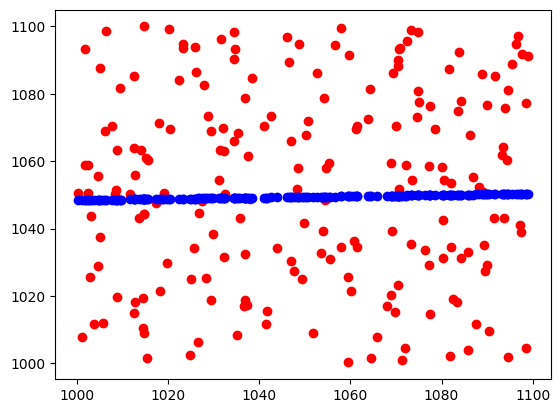

mse: 826.6819443494917
rmse: 28.752077217994035
平均絕對值誤差: 24.58693928882312
中位絕對值誤差: 22.889242578526364
r2: -0.012782271050647775


In [12]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model.fit(x_train1, y_train1)

import joblib
joblib.dump(model, 'model1A.pkl')
model1a = joblib.load('model1A.pkl')
predict = model1a.predict(x_test1)
plt.scatter(x_test1, y_test1, c='red')
plt.scatter(x_test1, predict, c='blue')
plt.show()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
print('mse:', mean_squared_error(y_test1, predict))
print('rmse:', np.sqrt(mean_squared_error(y_test1, predict)))
print('平均絕對值誤差:', mean_absolute_error(y_test1, predict))
print('中位絕對值誤差:', median_absolute_error(y_test1, predict))
print('r2:', r2_score(y_test1, predict))

204
204


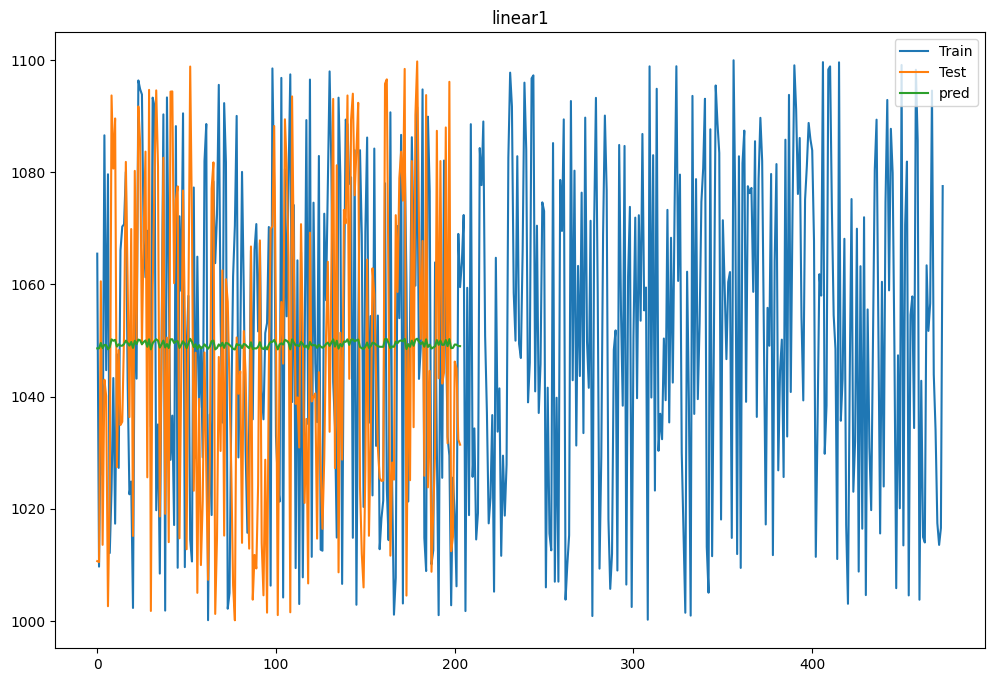

In [13]:
list7 = []

for i in range(len(test1B['T'])):
    list7.append(float(test1B.iloc[i].values))

trytopred = pd.DataFrame()
trytopred['X'] = list7
trytopred.dropna(axis = 0, how='any', inplace = True)
linear1 = test1B.copy()
linear1.dropna(axis = 0, how='any', inplace = True)
print(len(linear1))
print(len(trytopred))
y_pred = model1a.predict(trytopred)
linear1['pred'] = y_pred
plt.figure(figsize = (12,8))
plt.plot(train1B.index, train1B['T'], label='Train')
plt.plot(test1B.index, test1B['T'], label='Test')
plt.plot(linear1.index, linear1['pred'], label='pred')
plt.legend(loc='best')
plt.title("linear1")
plt.show()

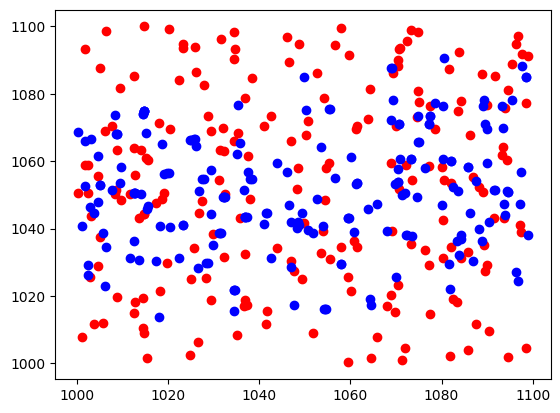

mse: 1182.9307327483525
rmse: 34.39376008447393
平均絕對值誤差: 29.295933661947377
中位絕對值誤差: 26.79562310647634
r2: -0.4492287901016381


In [14]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(x_train1, y_train1)

import joblib
joblib.dump(model, 'model1A.pkl')
model1a = joblib.load('model1A.pkl')
predict = model1a.predict(x_test1)
plt.scatter(x_test1, y_test1, c='red')
plt.scatter(x_test1, predict, c='blue')
plt.show()

import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
print('mse:', mean_squared_error(y_test1, predict))
print('rmse:', np.sqrt(mean_squared_error(y_test1, predict)))
print('平均絕對值誤差:', mean_absolute_error(y_test1, predict))
print('中位絕對值誤差:', median_absolute_error(y_test1, predict))
print('r2:', r2_score(y_test1, predict))

204
204


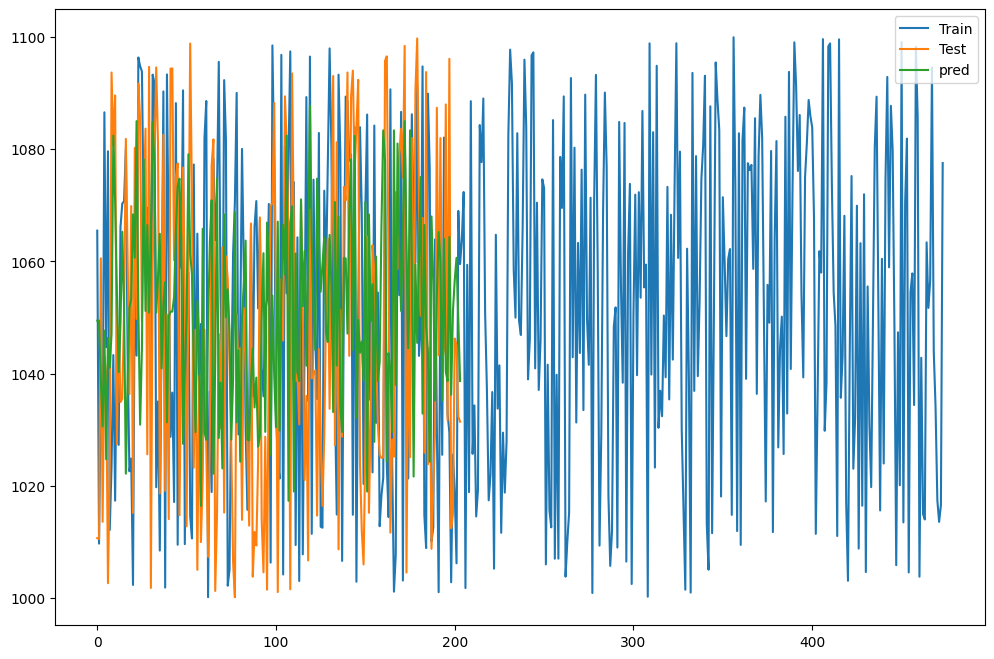

In [15]:
list7 = []

for i in range(len(test1B['T'])):
    list7.append(float(test1B.iloc[i].values))

trytopred = pd.DataFrame()
trytopred['X'] = list7
trytopred.dropna(axis = 0, how='any', inplace = True)
linear1 = test1B.copy()
linear1.dropna(axis = 0, how='any', inplace = True)
print(len(linear1))
print(len(trytopred))
y_pred = model1a.predict(trytopred)
linear1['pred'] = y_pred
plt.figure(figsize = (12,8))
plt.plot(train1B.index, train1B['T'], label='Train')
plt.plot(test1B.index, test1B['T'], label='Test')
plt.plot(linear1.index, linear1['pred'], label='pred')
plt.legend(loc='best')
plt.show()

(-0.9753836234744065,
 0.7621363564361012,
 0,
 12,
 {'1%': -4.137829282407408,
  '5%': -3.1549724074074077,
  '10%': -2.7144769444444443},
 31.2466098872313)

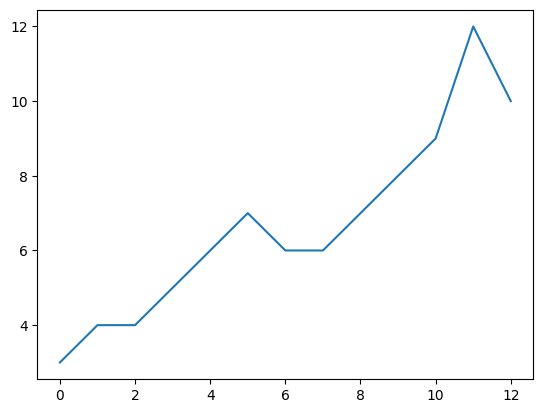

In [16]:
data = [3, 4, 4, 5, 6, 7, 6, 6, 7, 8, 9, 12, 10]

import matplotlib.pyplot as plt
plt.plot(data)
from statsmodels.tsa.stattools import adfuller  # perform augmented Dickey-Fuller test
adfuller(data)

In [17]:
!pip install numpy==1.24.4
!pip install pmdarima

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

best model:  ARIMA(0,0,0)(0,0,0)[0] intercept


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


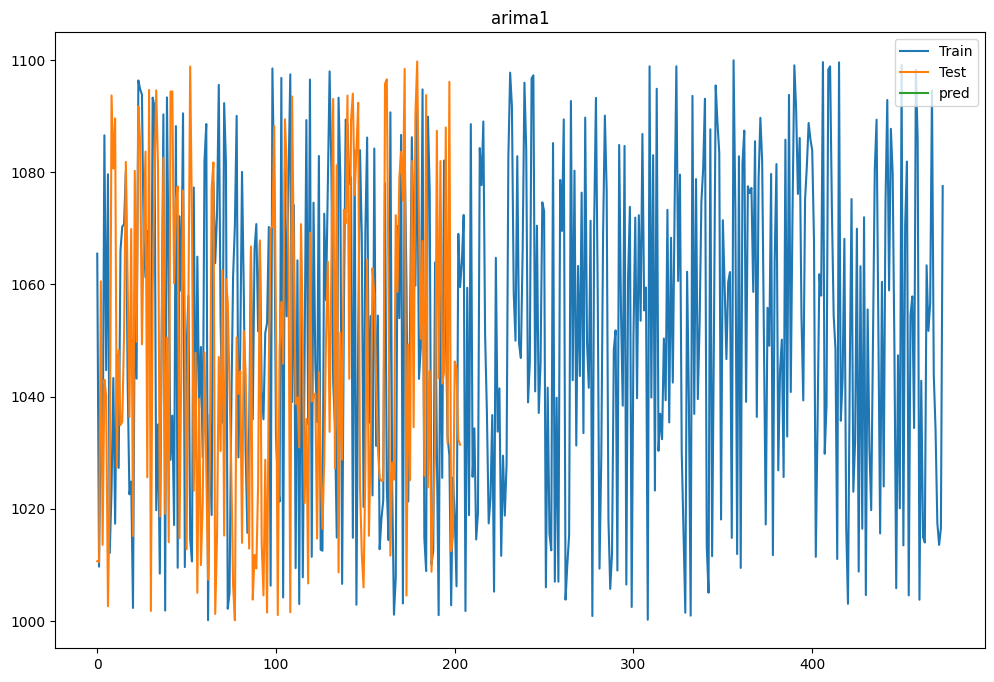

In [18]:
import pmdarima as pm
model = pm.auto_arima(train1B)
print('best model:', model)
n_periods = 1047
y_pred = model.predict(n_periods)
arima1 = test1B.copy()
arima1['pred'] = y_pred
plt.figure(figsize = (12,8))
plt.plot(train1B.index, train1B['T'], label='Train')
plt.plot(test1B.index, test1B['T'], label='Test')
plt.plot(arima1.index, arima1['pred'], label='pred')
plt.legend(loc='best')
plt.title("arima1")
plt.show()